In [1]:
#load lib
import pandas as pd
import numpy as np
import os
import seaborn as seb
import matplotlib.pyplot as plt

In [2]:
#load dataset
df0= os.path.join('/Users/joned/Desktop/Github/China-Life-Expectancy-Project/DataSet/', 'Data_1.xlsx')
df1= pd.read_excel(df0).drop(['Longitude','Latitude'],axis=1).fillna(0)

In [3]:
#China Life Expactancy Ranking Matrix
df2=pd.DataFrame()
df2['Province Name']=df1['Province Name']
list1=list(df1.columns.values)
del list1[0:2]
for i in list1:
    df2[i+' Rank']=df1[i].rank(method='min')

In [4]:
#Visualization of Ranking Matrix
cm = seb.light_palette("red",as_cmap=True)

reslut_m = df2.style.background_gradient(cmap=cm)
reslut_m

,Province Name,Province Code Rank,1990 All Rank,1990 Male Rank,1990 Female Rank,2000 All Rank,2000 Male Rank,2000 Female Rank,2010 All Rank,2010 Male Rank,2010 Female Rank
0,Beijing,2,30,30,29,30,30,30,30,31,30
1,Tianjin,27,28,29,27,29,29,28,29,29,29
2,Hebei,10,24,23,22,20,22,19,16,16,13
3,Shanxi1,25,19,20,18,16,17,15,15,18,11
4,InnerMongolia,19,7,7,7,8,7,9,9,11,10
5,Liaoning,18,23,25,21,25,25,24,24,25,23
6,Jilin,15,16,17,16,23,24,21,22,25,18
7,Heilongjiang,11,12,11,13,19,20,20,21,22,21
8,Shanghai,24,31,31,31,31,31,31,31,30,31
9,Jiangsu,16,26,26,26,26,26,26,27,27,21


The above "heat map" shows the rank of life expectancy by years, genders and region. The higher rank number means the higher life expectancy for a specific gender in a specific region.

*1990's life expectancy of Sichuan is unavailable so we sign its rank as 1.

In [5]:
#the World Bank indicators correlation
df3= os.path.join('/Users/joned/Desktop/Github/China-Life-Expectancy-Project/DataSet/', 'Indicators.xlsx')
df4= pd.read_excel(df3)

In [6]:
list2=list(df4.columns.values)
del list2[0]

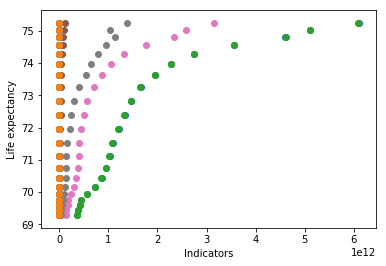

In [7]:
for i in list2:
    plt.scatter(df4[i], df4['Life expectancy at birth, total (years)'])
    plt.xlabel('Indicators')
    plt.ylabel('Life expectancy')

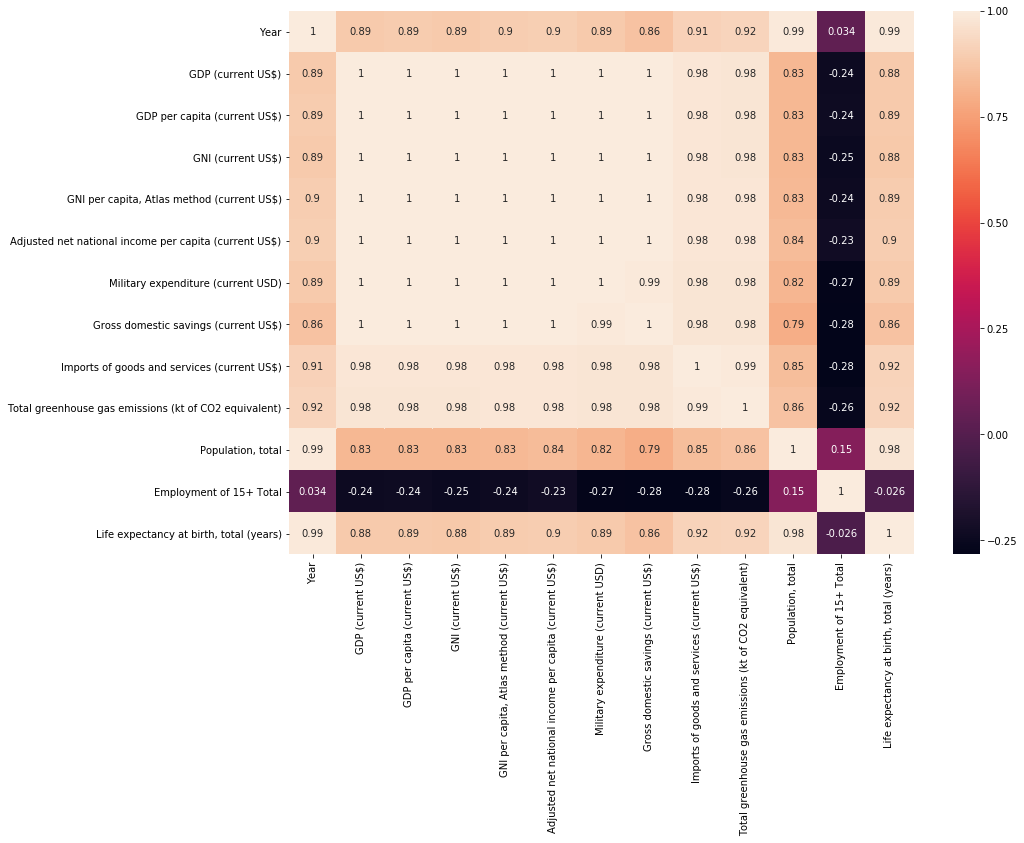

In [8]:
#Correlation matrix of the World Bank indicators
plt.figure(figsize = (14, 10))
seb.heatmap(df4.corr(), annot = True)

The last raw (column) of the matrix shows the correlation in between life expectancy and 12 indicators we selected from the World Bank database. We can find that the population, income and imports of good and service have significant positive impact for life expectancy and employment have negative relation with life expectancy.